In [2]:
%pip install pedalboard
%pip install python-dotenv
%pip install ipywidgets



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pluginsDir = '.plugins/'
mixDir = '.mixes/'
pgDir = '.playground/'

In [4]:
from pedalboard import load_plugin

gullfoss_path = pluginsDir + 'Gullfoss.vst3'
saturn2_path = pluginsDir + 'FabFilter Saturn 2.vst3'
pro_mb_path = pluginsDir + 'FabFilter Pro-MB.vst3'
prog_path = pluginsDir + 'FabFilter Pro-G.vst3'

def print_parameters(plugin):
  for param in plugin.parameters:
      print(param + ',' + str(eval('plugin.' + param)))

pro_s2 = load_plugin(saturn2_path)
gullfoss = load_plugin(gullfoss_path)
pro_mb = load_plugin(pro_mb_path)


In [5]:
def configure_promb(plugin, depthLevel):
  plugin.band_1_state = 'Enabled'
  plugin.band_1_high_crossover = 160
  plugin.band_1_threshold = -40
  plugin.band_1_range = -2
  plugin.band_1_attack = min((depthLevel - 1) * 5, 35)
  plugin.band_1_knee = 48 - ((depthLevel - 1) * 6)
  plugin.band_2_state = 'Enabled'
  plugin.band_2_low_crossover = 160
  plugin.band_2_high_crossover = 2560
  plugin.band_2_threshold = -40
  plugin.band_2_range = -1.5
  plugin.band_2_attack = min((depthLevel - 1) * 5, 35)
  plugin.band_2_knee = 48 - ((depthLevel - 1) * 6)
  plugin.band_3_state = 'Enabled'
  plugin.band_3_low_crossover = 2560
  plugin.band_3_high_crossover = 10240
  plugin.band_3_threshold = -40
  plugin.band_3_range = -1.0
  plugin.band_3_attack = min((depthLevel - 1) * 5, 35)
  plugin.band_3_knee = 48 - ((depthLevel - 1) * 6)
  plugin.band_4_state = 'Enabled'
  plugin.band_4_low_crossover = 10240
  plugin.band_4_threshold = -40
  plugin.band_4_range = -1.0
  plugin.band_4_attack = min((depthLevel - 1) * 5, 35)
  plugin.band_4_knee = 48 - ((depthLevel - 1) * 6)
  plugin.oversample = 2

In [6]:
def configure_gullfoss1(gullfoss, depthLevel):
  gullfoss.tame = 30
  gullfoss.boost_db = -3.5 + (depthLevel - 1) * 0.5

def configure_gullfoss2(gullfoss):
  gullfoss.recover = 30


In [7]:
def config_s2(plugin, depth):
  plugin.channel_mode = 'Mid/Side'
  plugin.band_1_style = 'Subtle Tube' if depth <= 5 else 'Subtle Tape'
  plugin.band_1_pan = 'Left: -0.12 dB / Right: 0 dB'
  plugin.input_gain = 16 - ((depth - 1) * 2)
  plugin.output_gain = -16 + ((depth - 1) * 2)
  plugin.input_pan.raw_value = 0.6
  plugin.output_pan.raw_value = 0.6
  plugin.band_1_dynamics = 0.1
  plugin.band_1_drive = 0
  plugin.band_1_mid = 2.5
  plugin.band_1_level = .2
  plugin.num_active_xy_controllers = 1
  plugin.xy_controller_1_mode = 'Slider'
  plugin.xy_controller_1_range = 'Positive (0 ... 1)'
  plugin.num_active_efs = 3
  plugin.ef_1_attack = 179.7
  plugin.ef_1_release = 904.6
  plugin.ef_2_attack = 9.68
  plugin.ef_2_release = 119.6
  plugin.ef_3_release = 99.79
  plugin.high_quality_mode = 'Good'
  plugin.num_active_slots = 26
  plugin.slot_1_source = 'EF 2'
  plugin.slot_1_level =  0.08
  plugin.slot_1_inverted = 'Inverted'
  plugin.slot_1_target = 'EF 1 Release'
  plugin.slot_2_source = 'EF 2'
  plugin.slot_2_level = 0.08
  plugin.slot_2_target = 'EF 1 Attack'
  plugin.slot_3_source = 'EF 1'
  plugin.slot_3_level = 0.05
  plugin.slot_3_inverted = 'Inverted'
  plugin.slot_3_target = 'B1 Mid'
  plugin.slot_4_source = 'EF 1'
  plugin.slot_4_level = 0
  plugin.slot_4_inverted = 'Inverted'
  plugin.slot_4_target = 'B1 Treble'
  plugin.slot_5_source = 'EF 2'
  plugin.slot_5_level = 0.015
  plugin.slot_5_inverted = 'Inverted'
  plugin.slot_5_target = 'Slot 4 Level'
  plugin.slot_6_source = 'EF 1'
  plugin.slot_6_level = 0.35
  plugin.slot_6_target = 'B1 Drive'
  plugin.slot_7_source = 'EF 3'
  plugin.slot_7_level = 0.24
  plugin.slot_7_inverted = 'Inverted'
  plugin.slot_7_target = 'Slot 6 Level'
  plugin.slot_8_source = 'EF 3'
  plugin.slot_8_level = 0.005
  plugin.slot_8_inverted = 'Inverted'
  plugin.slot_8_target = 'EF 2 Attack'
  plugin.slot_9_source = 'EF 3'
  plugin.slot_9_level = 0.001
  plugin.slot_9_inverted = 'Inverted'
  plugin.slot_9_target = 'B1 Bass'
  plugin.slot_10_source = 'EF 1'
  plugin.slot_10_level = 0.04
  plugin.slot_10_inverted = 'Inverted'
  plugin.slot_10_target = 'B1 Presence'
  plugin.slot_11_source = 'EF 3'
  plugin.slot_11_level = 0.2
  plugin.slot_11_inverted = 'Inverted'
  plugin.slot_11_target = 'Slot 10 Level'
  plugin.slot_12_source = 'EF 3'
  plugin.slot_12_level = 0.023
  plugin.slot_12_target = 'Slot 4 Level'
  plugin.slot_13_source = 'EF 1'
  plugin.slot_13_level = 0.01
  plugin.slot_13_target = 'B1 Output Pan'
  plugin.slot_14_source = 'EF 3'
  plugin.slot_14_level = 0.03
  plugin.slot_14_inverted = 'Inverted'
  plugin.slot_14_target = 'Slot 13 Level'
  plugin.slot_15_source = 'EF 1'
  plugin.slot_15_level = 0.001
  plugin.slot_15_target = 'Slot 9 Level'
  plugin.slot_16_source = 'EF 1'
  plugin.slot_16_level = 0.121
  plugin.slot_16_inverted = 'Inverted'
  plugin.slot_16_target = 'B1 Mix'
  plugin.slot_17_source = 'EF 3'
  plugin.slot_17_level = 0.195
  plugin.slot_17_inverted = 'Inverted'
  plugin.slot_17_target = 'Slot 16 Level'
  plugin.slot_18_source = 'XY 1 Ver'
  plugin.slot_18_level = 0.276
  plugin.slot_18_target = 'Slot 6 Level'
  plugin.slot_19_source = 'XY 1 Ver'
  plugin.slot_19_level = 0.178
  plugin.slot_19_target = 'B1 Drive'
  plugin.slot_20_source = 'EF 3'
  plugin.slot_20_level = 0
  plugin.slot_20_inverted = 'Inverted'
  plugin.slot_20_target = 'B1 Dynamics'
  plugin.slot_21_source = 'XY 1 Ver'
  plugin.slot_21_level = 0.05
  plugin.slot_21_target = 'Slot 20 Level'
  plugin.slot_22_source = 'XY 1 Ver'
  plugin.slot_22_level = 0.1
  plugin.slot_22_target = 'B1 Dynamics'
  plugin.slot_23_source = 'XY 1 Ver'
  plugin.slot_23_target = 'Input Gain'
  plugin.slot_24_source = 'XY 1 Ver'
  plugin.slot_24_level = 0.157
  plugin.slot_24_inverted = 'Inverted'
  plugin.slot_24_target = 'Output Gain'
  plugin.slot_25_source = 'XY 1 Ver'
  plugin.slot_25_level = 0.203
  plugin.slot_25_target = 'Slot 16 Level'
  plugin.slot_26_source = 'XY 1 Ver'
  plugin.slot_26_level = 0.069
  plugin.slot_26_target = 'Slot 17 Level'


In [35]:
import matplotlib.pyplot as plt
import numpy as np
from dotenv import dotenv_values
from pedalboard import Pedalboard, load_plugin
from pedalboard.io import AudioFile


def plot_waveforms(data1, title1='DAW Output'):
  plt.figure(figsize=(24, 5))
  plt.plot(data1, label=title1)
  plt.xlabel('Time [s]')
  plt.ylabel('Amplitude')
  plt.legend(loc='upper right')
  plt.show()

def smooth_curve(curve, window_size=101):
    # Apply moving average smoothing
    window = np.ones(window_size) / window_size
    smoothed_curve = np.convolve(curve, window, mode='same')
    return smoothed_curve

def calculate_gain_reduction(original, processed):
  noise = 0.00001
  gain_reduction = np.where(np.abs(original) < noise, 1, np.divide(np.abs(processed), np.abs(original)))
  return gain_reduction

def apply_gain_reduction(signal, gain_reduction):
    return np.array(signal) * np.array(gain_reduction)

def normalize(audio):
    max_val = np.max(np.abs(audio))
    if max_val > 0:
        normalized = audio / max_val
    return normalized

def combine_signals(original, processed):
    combined = (original + processed) / 2
    return combined

def compute_mse(data1, data2):
    return np.mean((normalize(data1) - normalize(data2)) ** 2)

In [80]:
import ipywidgets as widgets
import os
filesInPgDir = [f for f in os.listdir(pgDir) if os.path.isfile(os.path.join(pgDir, f))]
inputs = widgets.SelectMultiple(
    options=filesInPgDir,
    rows=10,
    description='Input Files',
    disabled=False
)
start_pos = widgets.IntText(
    value=60,
    description='Start Position',
    disabled=False
)
duration = widgets.IntText(
    value=30,
    description='Duration Of Song',
    disabled=False
)
ui = widgets.VBox([widgets.HBox([inputs, start_pos, duration])])
display(ui)


In [88]:
vals = inputs.value
print(vals)
assert len(vals) > 0, "No files selected"
audio_files = [AudioFile(pgDir + val) for val in vals]
assert all(audio.samplerate == audio_files[0].samplerate for audio in audio_files), "Not all audio files have the same sample rate"
samplerate = audio_files[0].samplerate

start = int(start_pos.value * samplerate)
dur = int(duration.value)
print(start_pos.value, dur)
for audio in audio_files:
    audio.seek(start)
audios = [audio.read(dur * samplerate) for audio in audio_files]
# Add 1 sec silence at the start
# for i in range(len(audios)):
#     zeros = np.zeros((1, samplerate))
#     audios[i] = np.concatenate((zeros, audios[i]), axis=1)

combined_op_name = widgets.Text(
    value='py-combined.wav',
    placeholder='Combined Output File Name',
    description='String:',
    disabled=False   
)
processed_op_name = widgets.Text(
    value='py-op.wav',
    placeholder='Processed Output File Name',
    description='String:',
    disabled=False   
)
ui2 = widgets.VBox([widgets.HBox([combined_op_name, processed_op_name])])
display(ui2)

('Guitar 1.wav', 'Snare L.wav')
120 6


In [89]:
audio = audios[0]
sidechain = audios[0]
for i in range(1, len(audios)):
    audio += audios[i]
    sidechain += audios[i]
audio /= len(audios)
sidechain /= len(audios)
gullfoss = load_plugin(pluginsDir + 'gullfoss.vst3')
gullfoss.tame = 30
gullfoss.boost_db = -3.5
gullfoss.gain_db = 0
# gullfoss.show_editor()

sidechainBoard = Pedalboard([gullfoss])


0.009129872


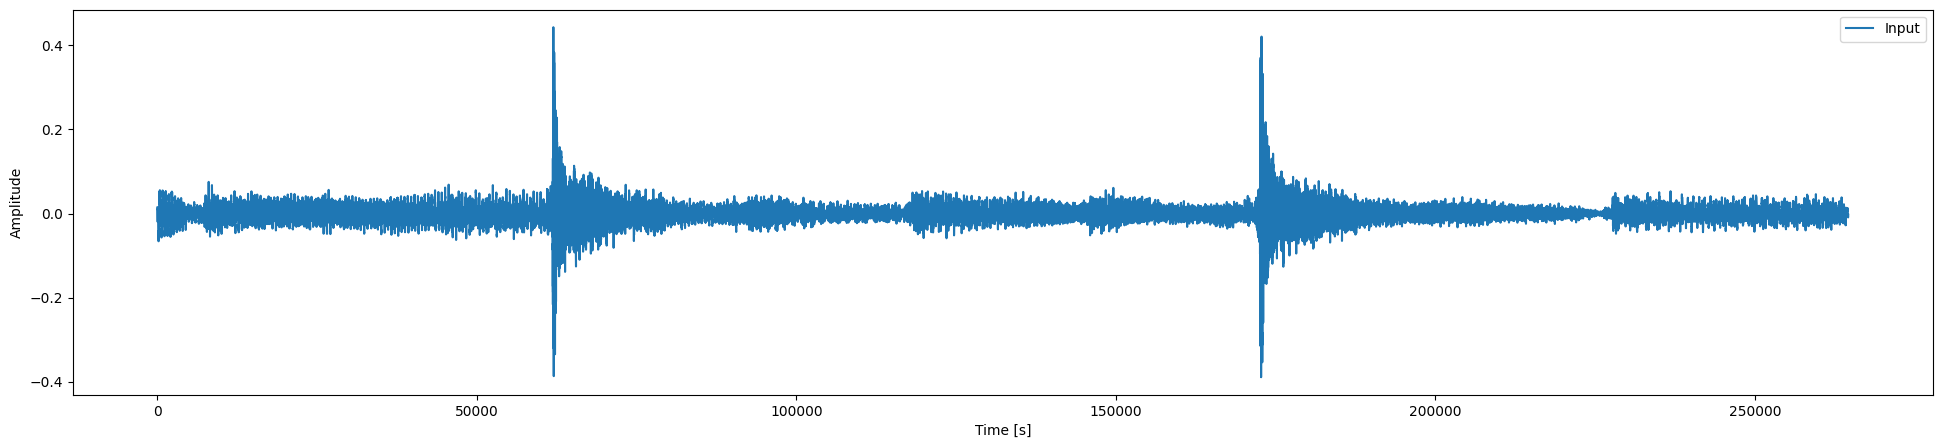

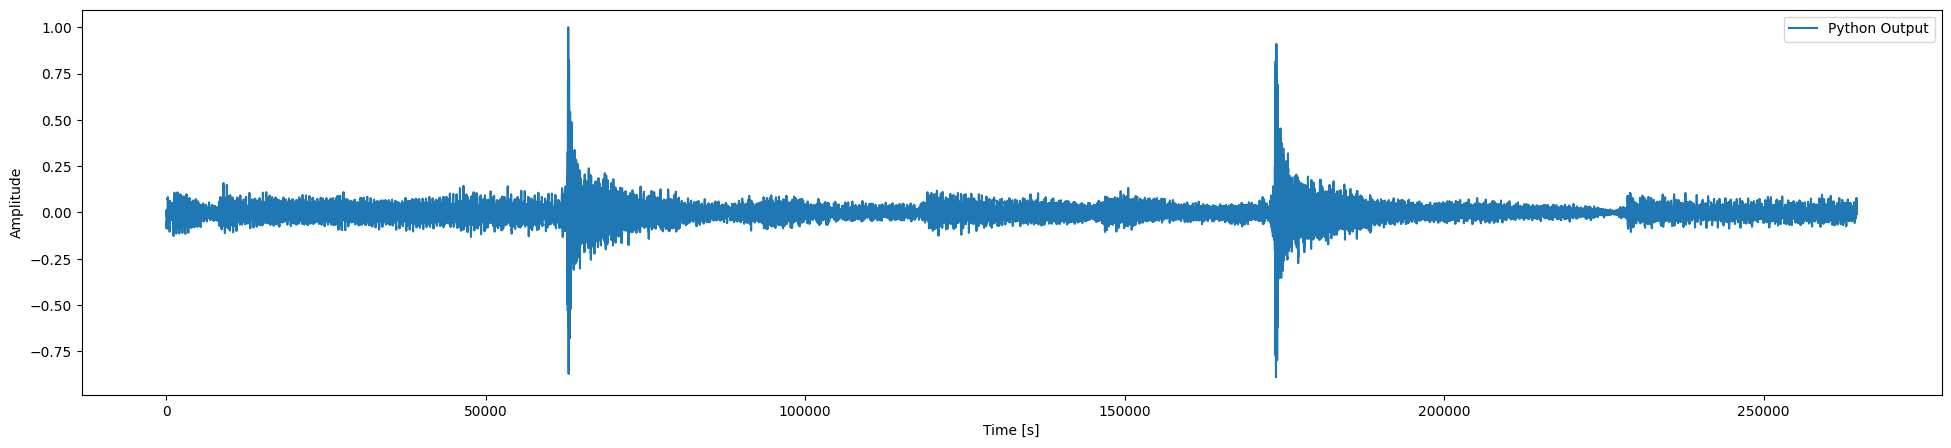

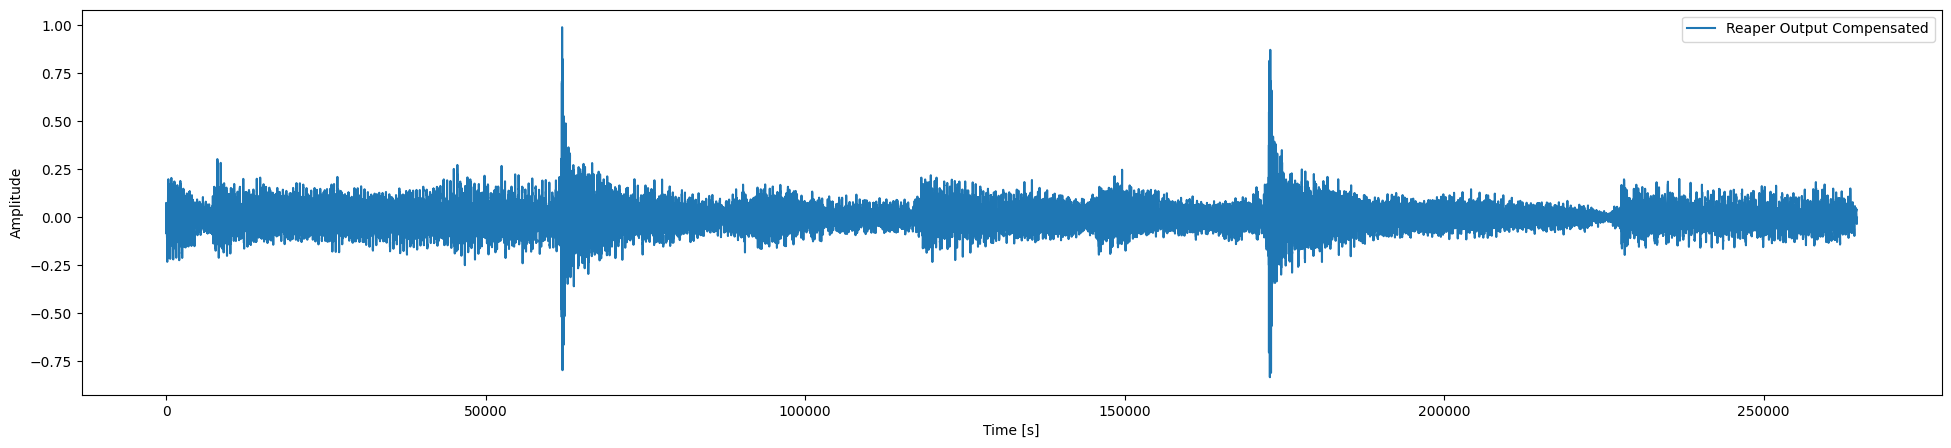

In [93]:
gullfoss.show_editor()
sidechain_output = sidechainBoard(sidechain, samplerate, reset=False)
sidechain_output = normalize(sidechain_output)
# Plugin Delay Compensation
rpop = AudioFile(mixDir + 'rp-op.wav')
rp = rpop.read(rpop.frames)
locationOfPeakInSidechain = np.argmax(np.abs(sidechain[0]))
locationOfPeakInSidechainOutput = np.argmax(np.abs(sidechain_output[0]))
pdc = (locationOfPeakInSidechainOutput - locationOfPeakInSidechain) * 2
# print(pdc)
# print(sidechain_output[0][0], sidechain_output[0][pdc])
# for i in range(0, sidechain_output.shape[1] - pdc):
#     sidechain_output[0][i] = sidechain_output[0][i + pdc]
print(sidechain_output[0][0])
plot_waveforms(audio[0], 'Input')
plot_waveforms(sidechain_output[0], 'Python Output')
plot_waveforms(rp[0], 'Reaper Output Compensated')
# plot_waveforms(np.abs(audio[0]) - np.abs(sidechain_output[0]), 'Diff')

# gain_reduction = np.array(calculate_gain_reduction(sidechain, sidechain_output))
# print(gain_reduction)
# plot_waveforms(gain_reduction[0], 'Gain Reduction')
# smooth = smooth_curve(gain_reduction[0], window_size=5001)
# plot_waveforms(smooth, 'Smooth Gain Reduction')




In [ ]:
output = sidechainBoard(audio, samplerate, reset=False)
output = np.add(output, [smooth])
output = audio


In [73]:


with AudioFile('.mixes/' + combined_op_name.value, 'w', samplerate, audio.shape[0]) as f:
    f.write(audio)
with AudioFile('.mixes/' + processed_op_name.value, 'w', samplerate, sidechain_output.shape[0]) as f:
    f.write(sidechain_output)

In [ ]:
filesInMixDir = [f for f in os.listdir(mixDir) if os.path.isfile(os.path.join(mixDir, f))]
mixed_files = widgets.SelectMultiple(
    options=filesInMixDir,
    rows=10,
    description='Mixed Files',
    disabled=False
)
ui3 = widgets.VBox([widgets.HBox([mixed_files])])
display(ui3)

('py-op.wav', 'rp-op.wav')
MSE: 0.007932068


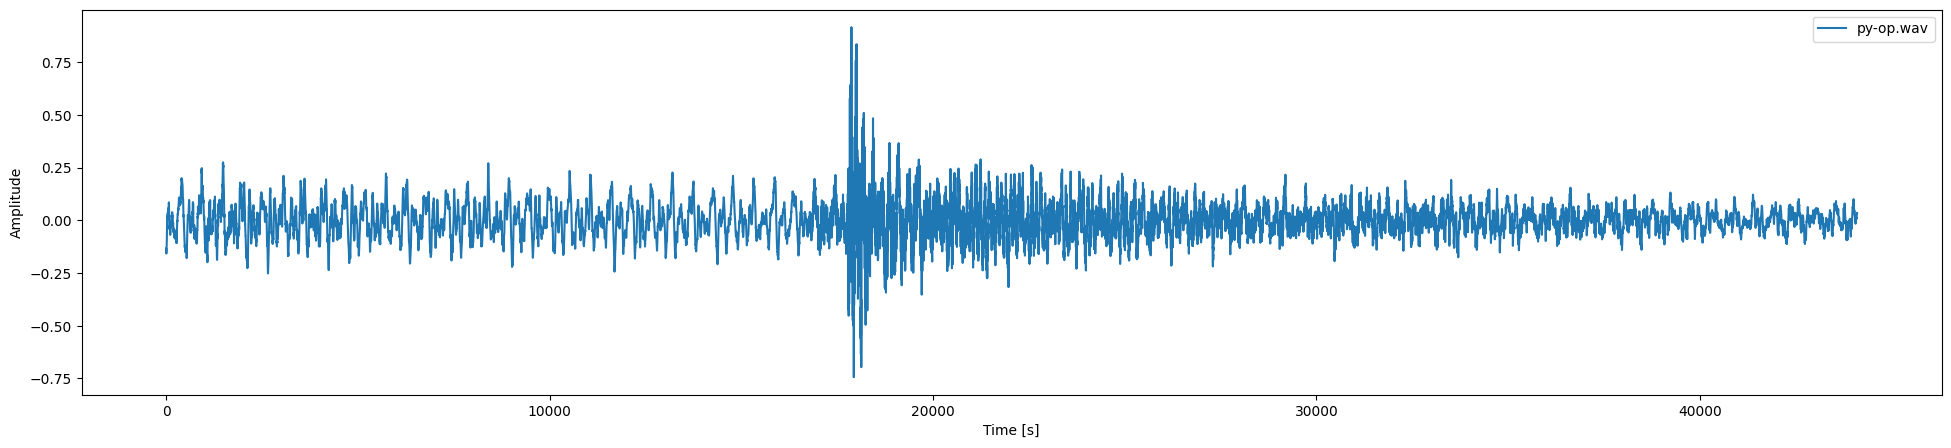

0.91503644 -0.7439802


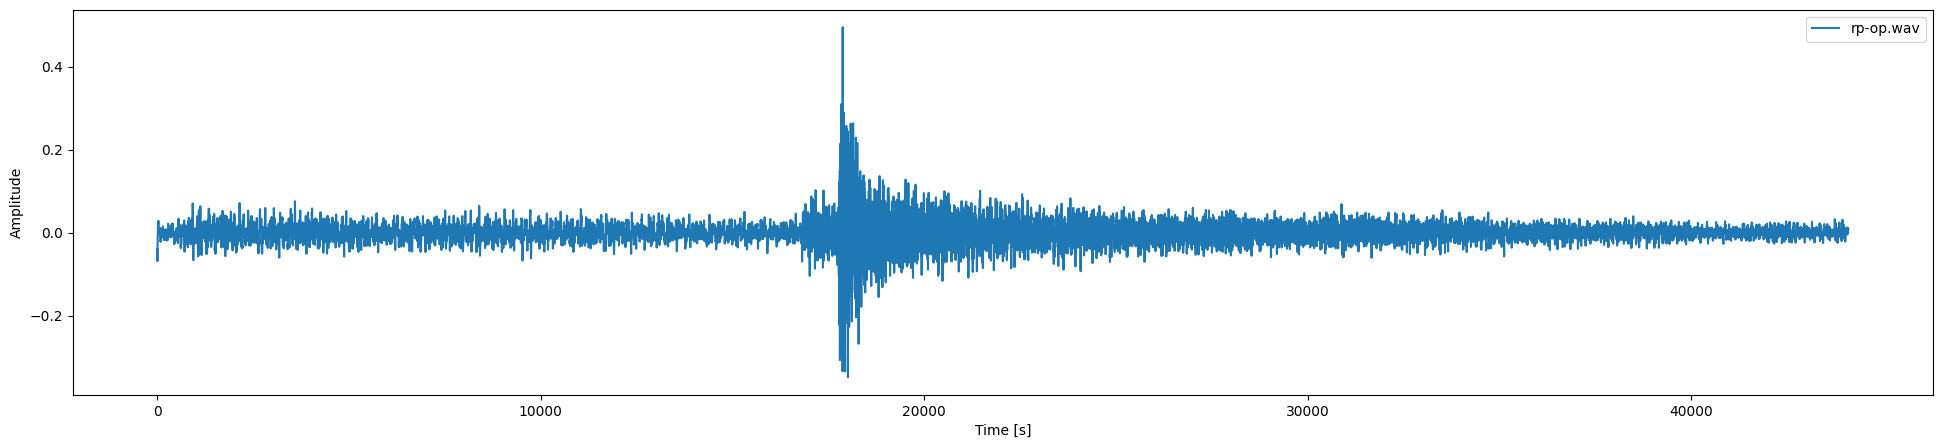

0.4951323 -0.3485519


In [ ]:
mixed_vals = mixed_files.value
assert len(mixed_vals) == 2, "Select 2 files"
print(mixed_vals)
all_files = [AudioFile('.mixes/' + val) for val in mixed_vals]
fileData = [audio.read(audio.frames) for audio in all_files]
normalizedFileData = [data for data in fileData]
# newData = np.zeros_like(normalizedFileData[0])
# temp = 958
# for i in range(1, newData.shape[1] - temp):
#     newData[0][i] = normalizedFileData[0][0][i + temp]
# for i in range(newData.shape[1] - temp, newData.shape[1]):
#     newData[0][i] = normalizedFileData[1][0][i]
# normalizedFileData[0][0] = newData
                                      
print('MSE:', compute_mse(normalizedFileData[0], normalizedFileData[1]))
for i in range(2):
    plot_waveforms(normalizedFileData[i][0], mixed_vals[i])
    print(np.max(normalizedFileData[i][0]), np.min(normalizedFileData[i][0]))
